<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithhour_withdamflowinX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
rain_data09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/09.csv',encoding='utf-8')
rain_data10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/10.csv',encoding='utf-8')
rain_data11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/11.csv',encoding='utf-8')
rain_data12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/12.csv',encoding='utf-8')
rain_data13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/13.csv',encoding='utf-8')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data.csv',encoding='utf-8')

In [157]:
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, how='outer'),[rain_data09, rain_data10, rain_data11, rain_data12, rain_data13])

print(rain_data)
print(data)

date = []

for rain_date in rain_data['date']:
  if rain_date not in date:
    date.append(rain_date)

print(date)

             date   hour  code name  rain
0      2009-01-16   3:00   101   춘천   0.1
1      2009-01-16   6:00   100  대관령   0.0
2      2009-01-16   6:00   101   춘천   0.2
3      2009-01-16   6:00   212   홍천   0.0
4      2009-01-16   9:00   100  대관령   0.0
...           ...    ...   ...  ...   ...
23635  2013-12-27  12:00   211   인제   0.0
23636  2013-12-27  15:00   211   인제   0.0
23637  2013-12-29  18:00   101   춘천   0.0
23638  2013-12-29  21:00   101   춘천   0.0
23639  2013-12-30   0:00   101   춘천   0.0

[23640 rows x 5 columns]
Empty DataFrame
Columns: [date, 0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00, dam_flow]
Index: []

[0 rows x 26 columns]
['2009-01-16', '2009-01-18', '2009-01-19', '2009-01-22', '2009-01-23', '2009-01-24', '2009-01-25', '2009-01-26', '2009-01-30', '2009-01-31', '2009-02-01', '2009-02-03', '2009-02-05', '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13'

In [158]:
data['date'] = date

data = data.fillna(0)
# data.set_index("date")
data.index = data['date']
print(data)

                  date  0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  \
date                                                                           
2009-01-16  2009-01-16     0     0     0     0     0     0     0     0     0   
2009-01-18  2009-01-18     0     0     0     0     0     0     0     0     0   
2009-01-19  2009-01-19     0     0     0     0     0     0     0     0     0   
2009-01-22  2009-01-22     0     0     0     0     0     0     0     0     0   
2009-01-23  2009-01-23     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2013-12-21  2013-12-21     0     0     0     0     0     0     0     0     0   
2013-12-26  2013-12-26     0     0     0     0     0     0     0     0     0   
2013-12-27  2013-12-27     0     0     0     0     0     0     0     0     0   
2013-12-29  2013-12-29     0     0     0     0     0     0     0     0     0   
2013-12-30  2013-12-30     0     0     0

In [159]:
for l in range(len(rain_data)):
  date_value = rain_data['date'][l]
  hour_value = rain_data['hour'][l]
  code_value = rain_data['code'][l]
  rain_value = rain_data['rain'][l]
  # print(date_value, hour_value, code_value, rain_value)
  rain = data.loc[date_value][hour_value]
  if code_value == 100:
    rain_value = rain_value * 0.114
  elif code_value == 101 :
    rain_value = rain_value * 0.128
  elif code_value == 90:
    rain_value = rain_value * 0.094
  elif code_value == 211:
    rain_value = rain_value * 0.668
  rain = rain + rain_value
  data.loc[date_value, hour_value] = rain

print(data)

                  date   0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                          
2009-01-16  2009-01-16  0.000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...    ...   ...   ...     ...   ...   ...     ...   ...   
2013-12-21  2013-12-21  0.163   0.0   0.0  0.4440   0.0   0.0  0.1938   0.0   
2013-12-26  2013-12-26  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-27  2013-12-27  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-29  2013-12-29  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-30  2013-12-30  0.000   0.0   0.0  0.0000   

In [160]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/dam_flow0913.csv',encoding='utf-8')
dam_flow.set_index("date", inplace = True)
print(dam_flow)

            dam flow(㎥/s)
date                     
2009-01-01          0.000
2009-01-02          0.825
2009-01-03          3.904
2009-01-04          0.000
2009-01-05          0.000
...                   ...
2013-12-27         10.324
2013-12-28          6.111
2013-12-29          6.250
2013-12-30          7.081
2013-12-31          5.888

[1826 rows x 1 columns]


In [161]:
from functools import reduce

date_index = data.index
dam_value = dam_flow.loc[date_index]
print(dam_value)

data.rename(columns = {'date':'Date'}, inplace=True)
data = reduce(lambda x,y : pd.merge(x,y, on='date', how='outer'), [data, dam_value])

            dam flow(㎥/s)
date                     
2009-01-16          0.000
2009-01-18          0.000
2009-01-19          2.688
2009-01-22          0.957
2009-01-23          0.797
...                   ...
2013-12-21         11.636
2013-12-26          4.476
2013-12-27         10.324
2013-12-29          6.250
2013-12-30          7.081

[1043 rows x 1 columns]


In [162]:
data = data.drop(['dam_flow'], axis=1)
print(data)

                  Date   0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                          
2009-01-16  2009-01-16  0.000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...    ...   ...   ...     ...   ...   ...     ...   ...   
2013-12-21  2013-12-21  0.163   0.0   0.0  0.4440   0.0   0.0  0.1938   0.0   
2013-12-26  2013-12-26  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-27  2013-12-27  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-29  2013-12-29  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-30  2013-12-30  0.000   0.0   0.0  0.0000   

<Axes: xlabel='date'>

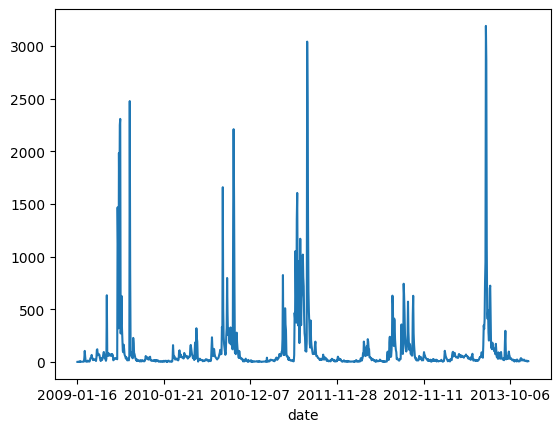

In [163]:
damflow = data['dam flow(㎥/s)']

damflow.plot()

In [164]:
print(max(data['dam flow(㎥/s)']))

3191.428


In [227]:
data['Y'] = data['dam flow(㎥/s)']
data = data.dropna()
print(data)

train = data[data['Date']<'2011-12-31']
valid = data[data['Date']>='2012-01-01']
valid = valid[valid['Date']<'2013-01-01']
test = data[data['Date']>='2013-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['Date', 'dam flow(㎥/s)','Y'], axis = 1), train['Y']
trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['Date','dam flow(㎥/s)', 'Y'], axis = 1), valid['Y']
validX = validX.to_numpy()
validY = validY.to_numpy()
validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['Date','dam flow(㎥/s)','Y'], axis = 1), test['Y']
testX = testX.to_numpy()
testY = testY.to_numpy()
testX = testX.reshape(testX.shape[0], testX.shape[1],1)


                  Date   0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                          
2009-01-16  2009-01-16  0.000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...    ...   ...   ...     ...   ...   ...     ...   ...   
2013-12-21  2013-12-21  0.163   0.0   0.0  0.4440   0.0   0.0  0.1938   0.0   
2013-12-26  2013-12-26  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-27  2013-12-27  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-29  2013-12-29  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-30  2013-12-30  0.000   0.0   0.0  0.0000   

In [228]:
print(trainX.shape, trainY.shape)

trainX

(615, 24, 1) (615,)


array([[[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       ...,

       [[0.428 ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.0512],
        [0.    ],
        [0.    ]],

       [[0.0668],
        [0.    ],
        [0.    ],
        ...,
        [0.0188],
        [0.    ],
        [0.    ]]])

In [229]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (24,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 64)                16896     
                                                                 
 dense_65 (Dense)            (None, 40)                2600      
                                                                 
 dense_66 (Dense)            (None, 40)                1640      
                                                                 
 dense_67 (Dense)            (None, 8)                 328       
                                                                 
 dense_68 (Dense)            (None, 8)                 72        
                                                                 
 dense_69 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 2154

In [230]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, batch_size = 10, epochs=50, callbacks=[cp1])

Epoch 1/50
58/62 [===========================>..] - ETA: 0s - loss: 133380.6094 - root_mean_squared_error: 365.2131

62/62 [==============================] - 3s 10ms/step - loss: 127073.1094 - root_mean_squared_error: 356.4731
Epoch 2/50
58/62 [===========================>..] - ETA: 0s - loss: 125432.1250 - root_mean_squared_error: 354.1640

62/62 [==============================] - 1s 10ms/step - loss: 127045.2266 - root_mean_squared_error: 356.4341
Epoch 3/50
62/62 [==============================] - ETA: 0s - loss: 126960.7656 - root_mean_squared_error: 356.3156

62/62 [==============================] - 1s 11ms/step - loss: 126960.7656 - root_mean_squared_error: 356.3156
Epoch 4/50
62/62 [==============================] - ETA: 0s - loss: 126498.9766 - root_mean_squared_error: 355.6669

62/62 [==============================] - 1s 10ms/step - loss: 126498.9766 - root_mean_squared_error: 355.6669
Epoch 5/50
60/62 [============================>.] - ETA: 0s - loss: 127790.3984 - root_mean_squared_error: 357.4778

62/62 [==============================] - 1s 10ms/step - loss: 125064.3672 - root_mean_squared_error: 353.6444
Epoch 6/50
57/62 [==========================>...] - ETA: 0s - loss: 119648.6328 - root_mean_squared_error: 345.9026

62/62 [==============================] - 1s 10ms/step - loss: 123141.2578 - root_mean_squared_error: 350.9149
Epoch 7/50
59/62 [===========================>..] - ETA: 0s - loss: 123557.3828 - root_mean_squared_error: 351.5073

62/62 [==============================] - 1s 10ms/step - loss: 120837.8828 - root_mean_squared_error: 347.6174
Epoch 8/50
57/62 [==========================>...] - ETA: 0s - loss: 121357.9375 - root_mean_squared_error: 348.3647

62/62 [==============================] - 1s 10ms/step - loss: 118395.2500 - root_mean_squared_error: 344.0861
Epoch 9/50
58/62 [===========================>..] - ETA: 0s - loss: 107263.0078 - root_mean_squared_error: 327.5103

62/62 [==============================] - 1s 11ms/step - loss: 115987.5938 - root_mean_squared_error: 340.5695
Epoch 10/50
60/62 [============================>.] - ETA: 0s - loss: 114719.3203 - root_mean_squared_error: 338.7024

62/62 [==============================] - 1s 16ms/step - loss: 114127.4297 - root_mean_squared_error: 337.8275
Epoch 11/50
61/62 [============================>.] - ETA: 0s - loss: 113579.1484 - root_mean_squared_error: 337.0150

62/62 [==============================] - 1s 16ms/step - loss: 112687.8672 - root_mean_squared_error: 335.6901
Epoch 12/50
62/62 [==============================] - ETA: 0s - loss: 111804.1484 - root_mean_squared_error: 334.3713

62/62 [==============================] - 1s 16ms/step - loss: 111804.1484 - root_mean_squared_error: 334.3713
Epoch 13/50
61/62 [============================>.] - ETA: 0s - loss: 112117.1172 - root_mean_squared_error: 334.8389

62/62 [==============================] - 1s 17ms/step - loss: 111274.0000 - root_mean_squared_error: 333.5776
Epoch 14/50
59/62 [===========================>..] - ETA: 0s - loss: 110939.1484 - root_mean_squared_error: 333.0753

62/62 [==============================] - 1s 11ms/step - loss: 110876.2500 - root_mean_squared_error: 332.9809
Epoch 15/50
59/62 [===========================>..] - ETA: 0s - loss: 95461.5625 - root_mean_squared_error: 308.9685

62/62 [==============================] - 1s 10ms/step - loss: 110443.8281 - root_mean_squared_error: 332.3309
Epoch 16/50
61/62 [============================>.] - ETA: 0s - loss: 110527.2812 - root_mean_squared_error: 332.4564

62/62 [==============================] - 1s 10ms/step - loss: 109689.9766 - root_mean_squared_error: 331.1948
Epoch 17/50
59/62 [===========================>..] - ETA: 0s - loss: 109083.8750 - root_mean_squared_error: 330.2785

62/62 [==============================] - 1s 11ms/step - loss: 107874.9609 - root_mean_squared_error: 328.4432
Epoch 18/50
61/62 [============================>.] - ETA: 0s - loss: 106630.6641 - root_mean_squared_error: 326.5435

62/62 [==============================] - 1s 10ms/step - loss: 105784.0547 - root_mean_squared_error: 325.2446
Epoch 19/50
60/62 [============================>.] - ETA: 0s - loss: 106852.2969 - root_mean_squared_error: 326.8827

62/62 [==============================] - 1s 10ms/step - loss: 104460.9922 - root_mean_squared_error: 323.2043
Epoch 20/50
60/62 [============================>.] - ETA: 0s - loss: 104916.7500 - root_mean_squared_error: 323.9085

62/62 [==============================] - 1s 11ms/step - loss: 102521.2344 - root_mean_squared_error: 320.1894
Epoch 21/50
61/62 [============================>.] - ETA: 0s - loss: 101155.6094 - root_mean_squared_error: 318.0497

62/62 [==============================] - 1s 10ms/step - loss: 100559.8516 - root_mean_squared_error: 317.1117
Epoch 22/50
60/62 [============================>.] - ETA: 0s - loss: 99528.6172 - root_mean_squared_error: 315.4816

62/62 [==============================] - 1s 10ms/step - loss: 98726.3125 - root_mean_squared_error: 314.2074
Epoch 23/50
59/62 [===========================>..] - ETA: 0s - loss: 82351.6094 - root_mean_squared_error: 286.9697

62/62 [==============================] - 1s 11ms/step - loss: 96744.2812 - root_mean_squared_error: 311.0374
Epoch 24/50
61/62 [============================>.] - ETA: 0s - loss: 95142.8047 - root_mean_squared_error: 308.4523

62/62 [==============================] - 1s 11ms/step - loss: 94383.5078 - root_mean_squared_error: 307.2190
Epoch 25/50
58/62 [===========================>..] - ETA: 0s - loss: 90341.2969 - root_mean_squared_error: 300.5683

62/62 [==============================] - 1s 11ms/step - loss: 92654.1250 - root_mean_squared_error: 304.3914
Epoch 26/50
59/62 [===========================>..] - ETA: 0s - loss: 94858.0781 - root_mean_squared_error: 307.9904

62/62 [==============================] - 1s 10ms/step - loss: 91332.0234 - root_mean_squared_error: 302.2119
Epoch 27/50
61/62 [============================>.] - ETA: 0s - loss: 88831.8125 - root_mean_squared_error: 298.0467

62/62 [==============================] - 1s 10ms/step - loss: 88153.1953 - root_mean_squared_error: 296.9060
Epoch 28/50
61/62 [============================>.] - ETA: 0s - loss: 81333.3672 - root_mean_squared_error: 285.1901

62/62 [==============================] - 1s 11ms/step - loss: 87507.0078 - root_mean_squared_error: 295.8158
Epoch 29/50
60/62 [============================>.] - ETA: 0s - loss: 85233.7969 - root_mean_squared_error: 291.9483

62/62 [==============================] - 1s 15ms/step - loss: 84018.2344 - root_mean_squared_error: 289.8590
Epoch 30/50
60/62 [============================>.] - ETA: 0s - loss: 84715.9766 - root_mean_squared_error: 291.0601

62/62 [==============================] - 1s 17ms/step - loss: 82698.6797 - root_mean_squared_error: 287.5738
Epoch 31/50
59/62 [===========================>..] - ETA: 0s - loss: 82751.5156 - root_mean_squared_error: 287.6656

62/62 [==============================] - 1s 15ms/step - loss: 80138.8281 - root_mean_squared_error: 283.0880
Epoch 32/50
60/62 [============================>.] - ETA: 0s - loss: 80315.8438 - root_mean_squared_error: 283.4005

62/62 [==============================] - 1s 17ms/step - loss: 79527.3828 - root_mean_squared_error: 282.0060
Epoch 33/50
57/62 [==========================>...] - ETA: 0s - loss: 76565.0781 - root_mean_squared_error: 276.7039

62/62 [==============================] - 1s 10ms/step - loss: 77613.6250 - root_mean_squared_error: 278.5922
Epoch 34/50
61/62 [============================>.] - ETA: 0s - loss: 75890.5547 - root_mean_squared_error: 275.4824

62/62 [==============================] - 1s 10ms/step - loss: 77121.9688 - root_mean_squared_error: 277.7084
Epoch 35/50
57/62 [==========================>...] - ETA: 0s - loss: 77883.2578 - root_mean_squared_error: 279.0757

62/62 [==============================] - 1s 10ms/step - loss: 75009.4609 - root_mean_squared_error: 273.8785
Epoch 36/50
59/62 [===========================>..] - ETA: 0s - loss: 78904.8359 - root_mean_squared_error: 280.9001

62/62 [==============================] - 1s 11ms/step - loss: 77026.0391 - root_mean_squared_error: 277.5356
Epoch 37/50
60/62 [============================>.] - ETA: 0s - loss: 74104.1172 - root_mean_squared_error: 272.2207

62/62 [==============================] - 1s 10ms/step - loss: 74329.8125 - root_mean_squared_error: 272.6349
Epoch 38/50
62/62 [==============================] - ETA: 0s - loss: 71835.3203 - root_mean_squared_error: 268.0211

62/62 [==============================] - 1s 10ms/step - loss: 71835.3203 - root_mean_squared_error: 268.0211
Epoch 39/50
59/62 [===========================>..] - ETA: 0s - loss: 71843.1719 - root_mean_squared_error: 268.0358

62/62 [==============================] - 1s 10ms/step - loss: 71225.2891 - root_mean_squared_error: 266.8807
Epoch 40/50
58/62 [===========================>..] - ETA: 0s - loss: 70386.6484 - root_mean_squared_error: 265.3048

62/62 [==============================] - 1s 11ms/step - loss: 70159.6172 - root_mean_squared_error: 264.8766
Epoch 41/50
60/62 [============================>.] - ETA: 0s - loss: 72227.5312 - root_mean_squared_error: 268.7518

62/62 [==============================] - 1s 11ms/step - loss: 71080.9688 - root_mean_squared_error: 266.6101
Epoch 42/50
62/62 [==============================] - ETA: 0s - loss: 68574.3359 - root_mean_squared_error: 261.8670

62/62 [==============================] - 1s 11ms/step - loss: 68574.3359 - root_mean_squared_error: 261.8670
Epoch 43/50
62/62 [==============================] - ETA: 0s - loss: 66895.6406 - root_mean_squared_error: 258.6419

62/62 [==============================] - 1s 11ms/step - loss: 66895.6406 - root_mean_squared_error: 258.6419
Epoch 44/50
59/62 [===========================>..] - ETA: 0s - loss: 62889.9805 - root_mean_squared_error: 250.7787

62/62 [==============================] - 1s 22ms/step - loss: 66191.2031 - root_mean_squared_error: 257.2765
Epoch 45/50
62/62 [==============================] - ETA: 0s - loss: 65048.4805 - root_mean_squared_error: 255.0460

62/62 [==============================] - 1s 22ms/step - loss: 65048.4805 - root_mean_squared_error: 255.0460
Epoch 46/50
62/62 [==============================] - ETA: 0s - loss: 64357.0547 - root_mean_squared_error: 253.6869

62/62 [==============================] - 2s 34ms/step - loss: 64357.0547 - root_mean_squared_error: 253.6869
Epoch 47/50
60/62 [============================>.] - ETA: 0s - loss: 64790.4648 - root_mean_squared_error: 254.5397

62/62 [==============================] - 1s 17ms/step - loss: 63370.8242 - root_mean_squared_error: 251.7356
Epoch 48/50
60/62 [============================>.] - ETA: 0s - loss: 63943.3594 - root_mean_squared_error: 252.8702

62/62 [==============================] - 1s 16ms/step - loss: 62558.0742 - root_mean_squared_error: 250.1161
Epoch 49/50
59/62 [===========================>..] - ETA: 0s - loss: 62927.0391 - root_mean_squared_error: 250.8526

62/62 [==============================] - 1s 10ms/step - loss: 61571.5898 - root_mean_squared_error: 248.1362
Epoch 50/50
60/62 [============================>.] - ETA: 0s - loss: 58671.5117 - root_mean_squared_error: 242.2220

62/62 [==============================] - 1s 10ms/step - loss: 60922.9414 - root_mean_squared_error: 246.8257


In [231]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

7/7 [==============================] - 1s 5ms/step - loss: 67050.2656 - root_mean_squared_error: 258.9407
Train Score: 67050.27 MSE (258.94 RMSE)


In [232]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

20/20 [==============================] - 1s 6ms/step


,Train Predictions,Actuals
0,60.659866,0.000
1,60.534367,0.000
2,60.003647,2.688
3,60.040264,0.957
4,60.003647,0.797
...,...,...
610,60.356155,8.320
611,60.003643,8.726
612,66.295494,2.430
613,60.184444,2.730


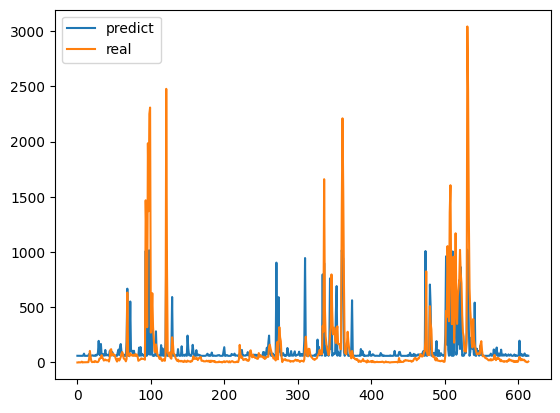

In [233]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

plt.legend(['predict','real'])

In [234]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

7/7 [==============================] - 0s 5ms/step


,Val Predictions,Actuals
0,60.070492,8.935
1,60.194210,15.280
2,60.086002,3.912
3,61.191959,3.159
4,60.040264,5.490
...,...,...
211,60.003647,9.702
212,60.231853,15.811
213,61.416634,9.933
214,67.547989,21.626


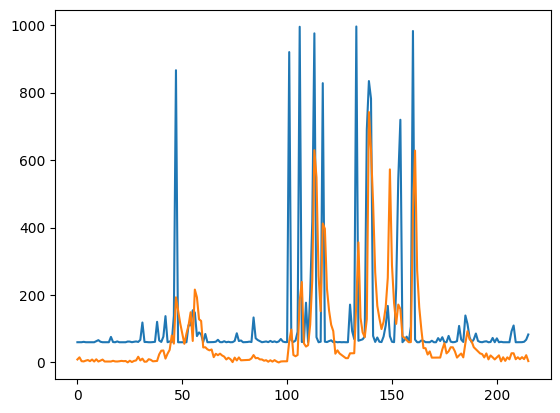

In [235]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])

In [236]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

7/7 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,62.148952,16.243
1,77.757133,10.171
2,60.020229,10.422
3,60.003647,4.445
4,61.527843,8.422
...,...,...
207,64.183281,11.636
208,60.154255,4.476
209,60.011036,10.324
210,60.003639,6.250


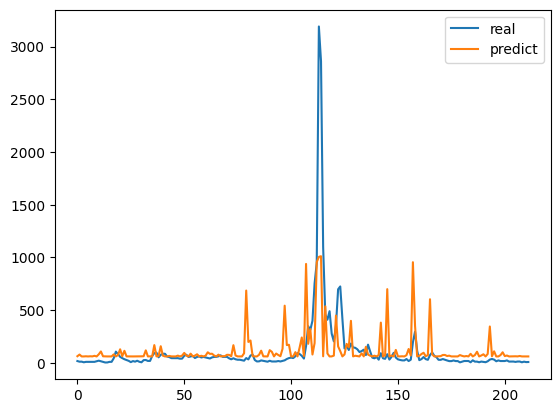

In [237]:
plt.plot(test_results['Actuals'][:])
plt.plot(test_results['Test Predictions'][:])
plt.legend(['real', 'predict'])